In [96]:
import awkward as ak
import seaborn as sns
import numpy as np

In [107]:
c4p4 = ak.from_parquet('data/c4p4.parquet')
c4p10 = ak.from_parquet('data/c4p10.parquet')

In [108]:
c4p4.fields

['ideal_cand',
 'cand_regret',
 'likability',
 'issues',
 'cov_matrix',
 'pl_h',
 'pl_s',
 'range_10_h',
 'range_10_s',
 'aprv_h',
 'aprv_s']

In [109]:
all_posns_c4p4 = ak.flatten(c4p4.issues, axis=1)

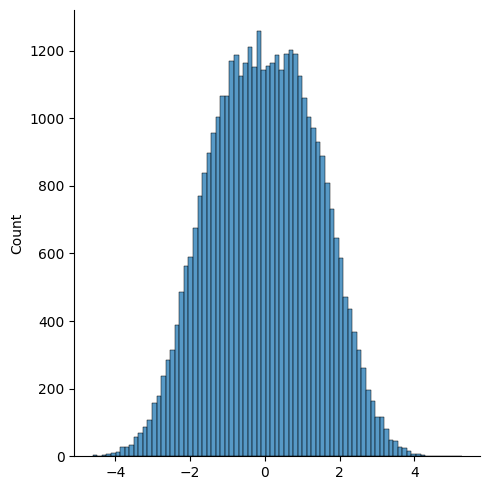

In [110]:
sns.displot(all_posns_c4p4[:,0])

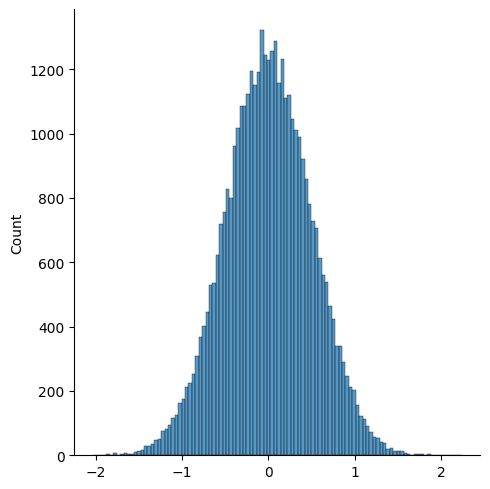

In [111]:
sns.displot(all_posns_c4p4[:,1])

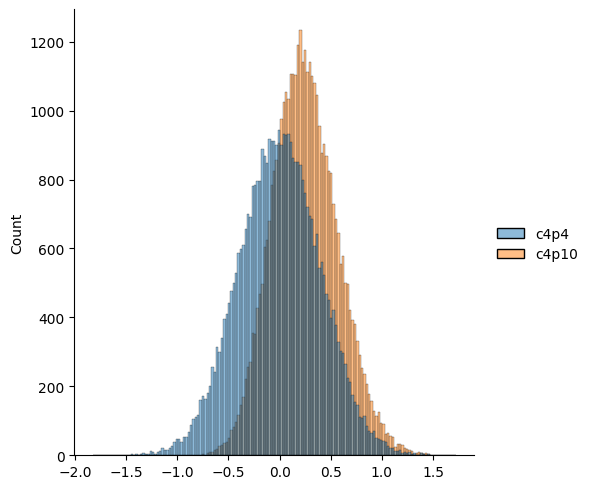

In [112]:
sns.displot({'c4p4':ak.ravel(c4p4.likability), 'c4p10':ak.ravel(c4p10.likability)})

In [113]:
print(ak.mean(ak.ravel(c4p4.likability)))
print(ak.mean(ak.ravel(c4p10.likability)))

0.0001375716856949025
0.25183671171364685


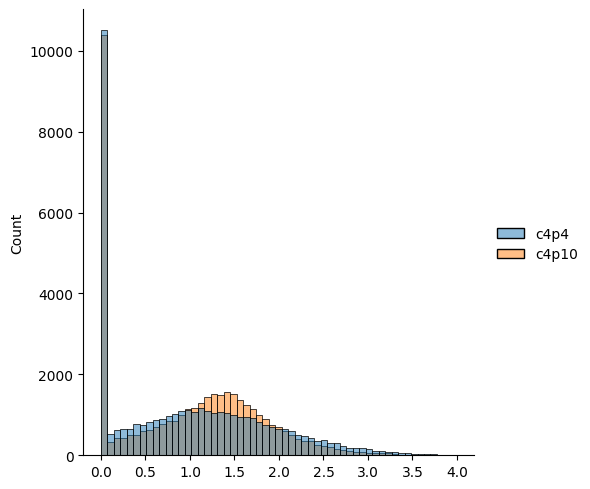

In [114]:
sns.displot({'c4p4':ak.ravel(c4p4.cand_regret), 'c4p10':ak.ravel(c4p10.cand_regret)})

In [115]:
issue_pairs = ak.combinations(c4p4.issues, n=2, axis=1)
issue_pairs[:2]

<Array [[([...], [...]), ..., (..., ...)], ...] type='2 * option[6 * (optio...'>

In [116]:
c4p4.issues[:2]

<Array [[[-0.0261, -1.06], ..., [...]], ...] type='2 * option[4 * option[2 ...'>

In [117]:
issue_pairs_flt = ak.flatten(issue_pairs, axis=1)
print(issue_pairs_flt[:2])

[([-0.0261, -1.06], [0.692, -0.3]), ([-0.0261, ...], [...])]


In [118]:
diffs = issue_pairs_flt["0"] - issue_pairs_flt["1"]
diffs

<Array [[-0.718, -0.759], ..., [3.28, ...]] type='60000 * option[2 * ?float64]'>

In [119]:
diffs**2

<Array [[0.516, 0.577], ..., [10.7, ...]] type='60000 * option[2 * ?float64]'>

In [120]:
issue_distances = np.sqrt(ak.sum(diffs**2, axis=1))
issue_distances[:3]

<Array [1.05, 1.2, 1.48] type='3 * ?float64'>

In [121]:
issue_pairs_p10 = ak.combinations(c4p10.issues, n=2, axis=1)
issue_pairs_flt_p10 = ak.flatten(issue_pairs_p10, axis=1)
diffs_p10 = issue_pairs_flt_p10["0"] - issue_pairs_flt_p10["1"]
issue_distances_p10 = np.sqrt(ak.sum(diffs_p10**2, axis=1))

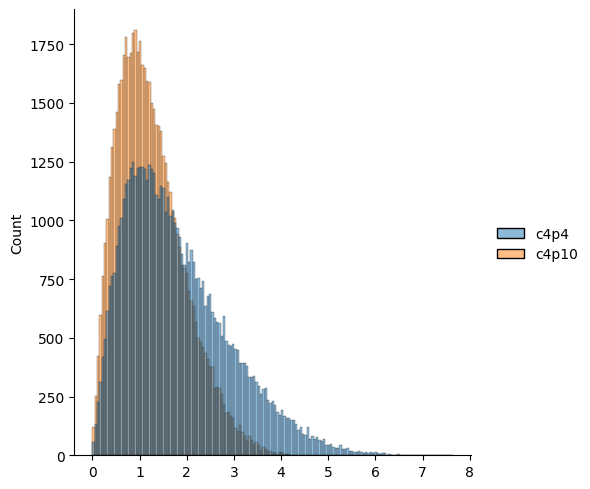

In [122]:
sns.displot({'c4p4': issue_distances, 'c4p10': issue_distances_p10})